In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [31]:
with open("out.txt") as f:
    lines = f.readlines()
lines = [list(map(float, line.strip().split())) for line in lines]
lines = np.array(lines)

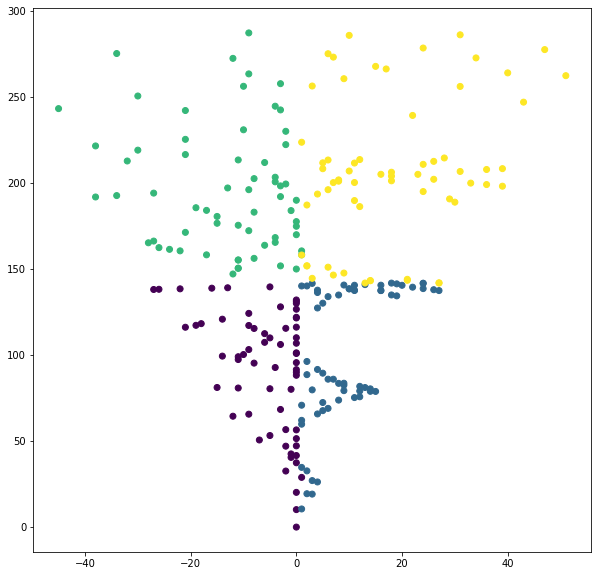

In [33]:
x = lines[:,-3].astype(int)
y = lines[:,-2]

colors = lines[:,-1].astype(int)
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(x, y, c=colors)

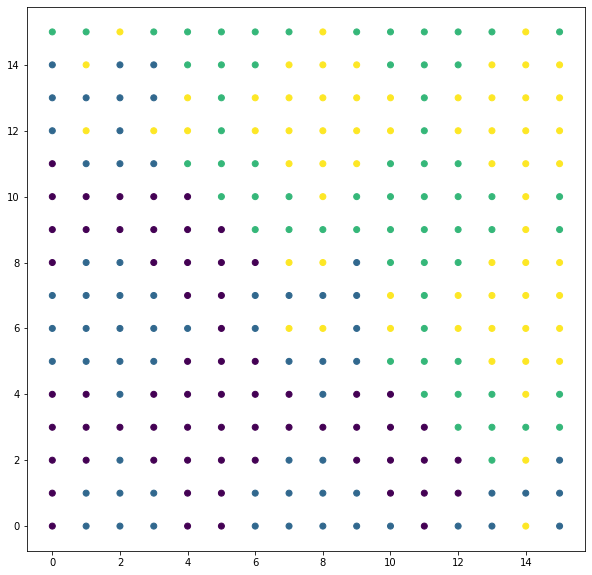

In [79]:
x = lines[:,0].astype(int)
y = lines[:,1]

colors = lines[:,-1].astype(int)
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(x, y, c=colors)

In [34]:
print(lines)

[[ 11.       3.     -27.8598 138.086    0.    ]
 [  5.       9.     -26.1808 138.202    0.    ]
 [  4.      10.     -22.3422 138.465    0.    ]
 ...
 [ 15.      13.      43.6166 246.964    3.    ]
 [ 14.      12.      47.696  277.506    3.    ]
 [ 14.      13.      51.2475 262.347    3.    ]]


In [76]:
n = int(max(lines[:,-1]))

colors = sns.color_palette(None, n + 2)
colors = colors.as_hex()
colors

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

In [77]:
graph_dict = {}

for line in lines:
    graph_dict[f"{int(line[0])} {int(line[1])}"] = [line[2], line[3], colors[int(line[-1])]]

In [78]:
with open("out.dot", "w") as f:
    print("graph {", file=f)
    for key, value in graph_dict.items():
        print(f'"{key}" [pos="{value[0]},{value[1]}!", shape=point, color="{value[2]}"]', file=f)
    max_i = int(max(lines[:,0]))
    max_j = int(max(lines[:,1]))
    for i in range(max_i + 1):
        for j in range(max_j + 1):
            if i < max_i:
                key1, key2 = f"{i} {j}", f"{i + 1} {j}"
                if graph_dict[key1][2] == graph_dict[key2][2]:
                    print(f'"{key1}" -- "{key2}" [color="{graph_dict[key1][2]}"]', file=f)
                else:
                    print(f'"{key1}" -- "{key2}" [color="{colors[-1]}"]', file=f)
            if j < max_j:
                key1, key2 = f"{i} {j}", f"{i} {j + 1}"
                if graph_dict[key1][2] == graph_dict[key2][2]:
                    print(f'"{key1}" -- "{key2}" [color="{graph_dict[key1][2]}"]', file=f)
                else:
                    print(f'"{key1}" -- "{key2}" [color="{colors[-1]}"]', file=f)
    print("}", file=f)
    
os.system("dot -Kfdp -n -Tpng -O out.dot")

0